In [1]:
import prepare as p

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#### Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

#### For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [4]:
df=p.store_data()
df.head()

,item,sale_amount,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,month_name,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,January,Tuesday,13.84
2013-01-01,17,26.0,295813,3,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,January,Tuesday,27.16
2013-01-01,7,32.0,125995,10,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231,1,January,Tuesday,41.64
2013-01-01,18,45.0,314073,3,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,January,Tuesday,49.39
2013-01-01,19,34.0,332333,3,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,January,Tuesday,34.74


In [11]:
df.reset_index().sale_date.value_counts()

2013-01-01    500
2016-05-11    500
2016-05-09    500
2016-05-08    500
2016-05-07    500
             ... 
2014-08-29    500
2014-08-28    500
2014-08-27    500
2014-08-26    500
2017-12-31    500
Name: sale_date, Length: 1826, dtype: int64

### Splitting data
human based

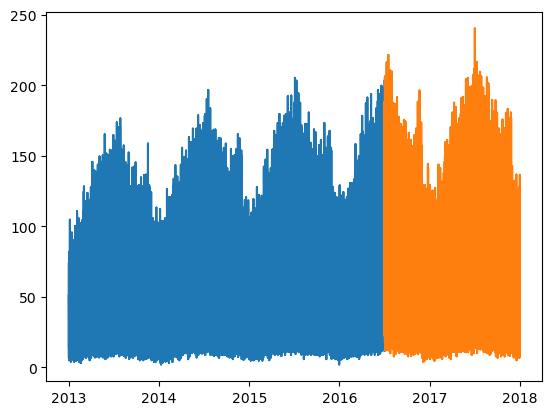

In [21]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

In [16]:
train = df.loc[:'2016']
test = df.loc['2017':]

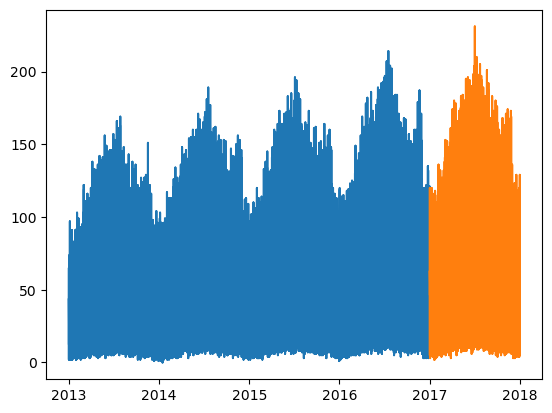

In [17]:
plt.plot(train.index, train.sale_amount)
plt.plot(test.index, test.sale_amount)
plt.show()

In [24]:
train.reset_index().groupby('sale_date').mean()

,item,sale_amount,sale_id,store,item_id,item_price,item_upc12,item_upc14,store_id,store_zipcode,month,sales_total
sale_date,,,,,,,,,,,,
2013-01-01,25.50,27.392,455588.00,5.50,25.50,5.1604,2.384688e+11,2.384688e+11,5.50,78224.80,1.0,32.5524
2013-01-02,25.50,27.356,455589.00,5.50,25.50,5.1604,2.384688e+11,2.384688e+11,5.50,78224.80,1.0,32.5164
2013-01-03,25.50,28.976,455590.00,5.50,25.50,5.1604,2.384688e+11,2.384688e+11,5.50,78224.80,1.0,34.1364
2013-01-04,25.50,31.354,455591.00,5.50,25.50,5.1604,2.384688e+11,2.384688e+11,5.50,78224.80,1.0,36.5144
2013-01-05,25.50,32.474,455592.00,5.50,25.50,5.1604,2.384688e+11,2.384688e+11,5.50,78224.80,1.0,37.6344
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-28,25.50,63.078,456862.00,5.50,25.50,5.1604,2.384688e+11,2.384688e+11,5.50,78224.80,6.0,68.2384
2016-06-29,25.50,63.276,456863.00,5.50,25.50,5.1604,2.384688e+11,2.384688e+11,5.50,78224.80,6.0,68.4364
2016-06-30,25.50,67.664,456864.00,5.50,25.50,5.1604,2.384688e+11,2.384688e+11,5.50,78224.80,6.0,72.8244


item


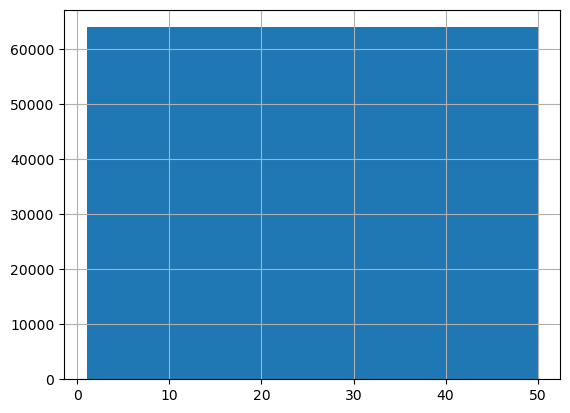

sale_amount


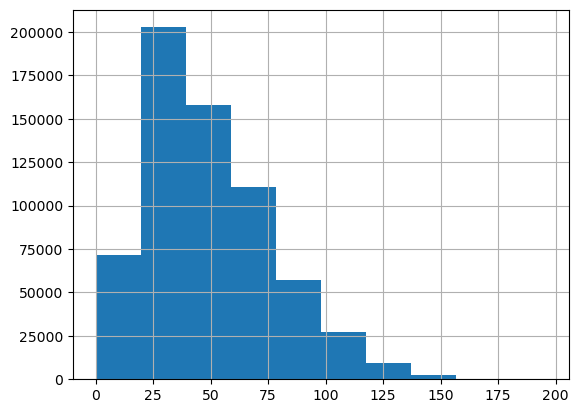

sale_id


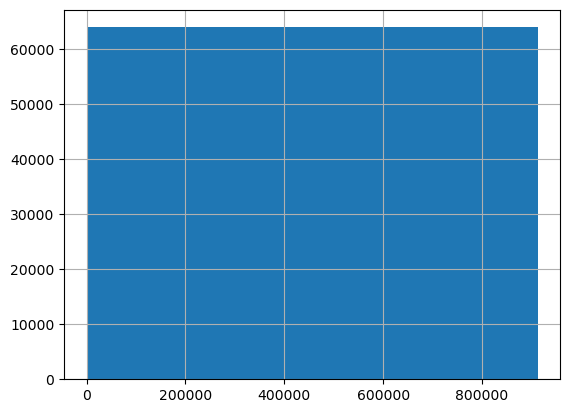

store


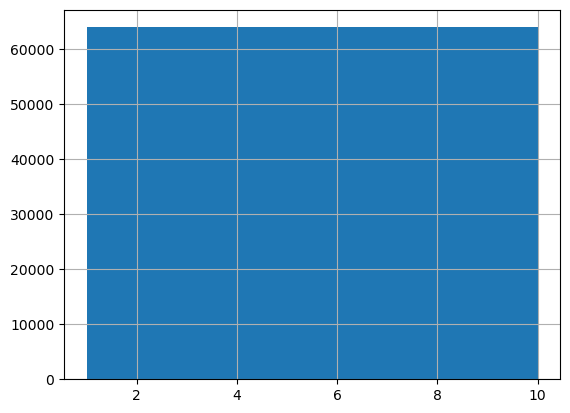

item_brand


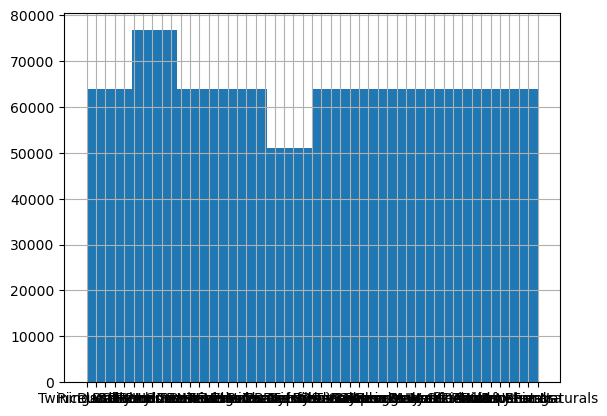

item_id


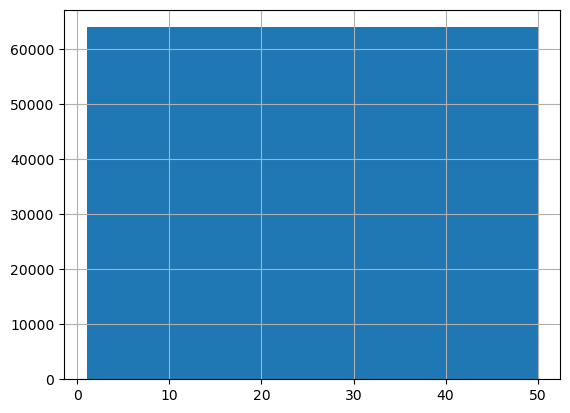

item_name


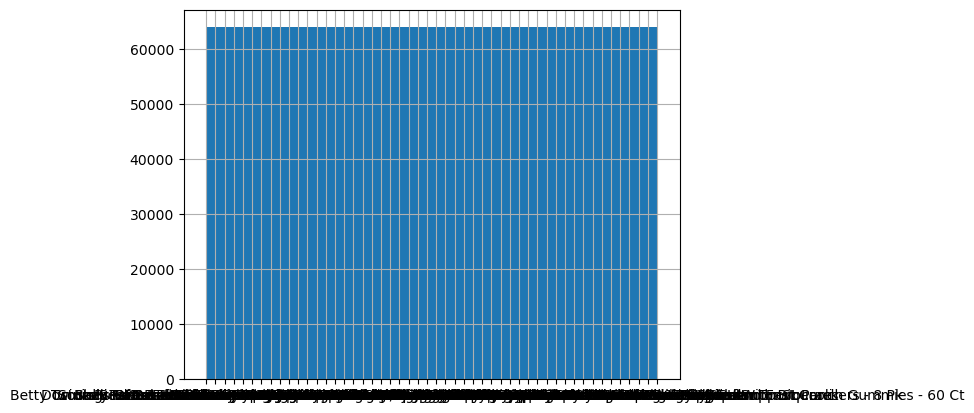

item_price


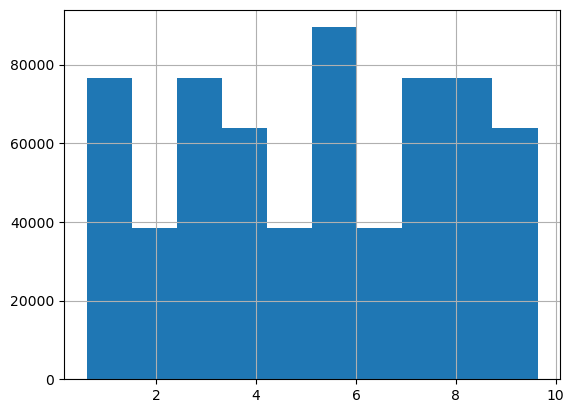

item_upc12


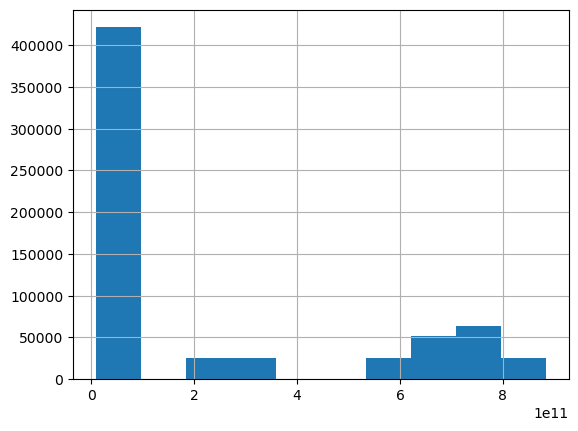

item_upc14


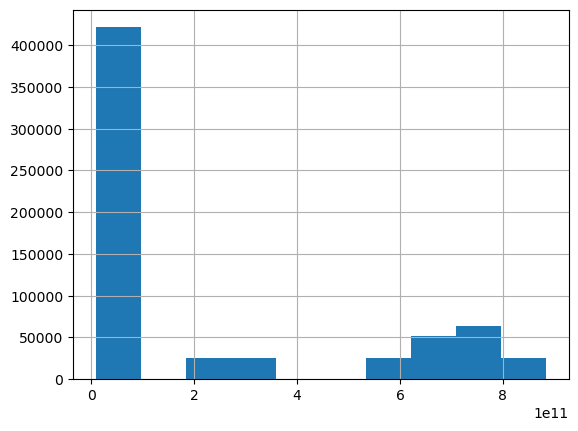

store_address


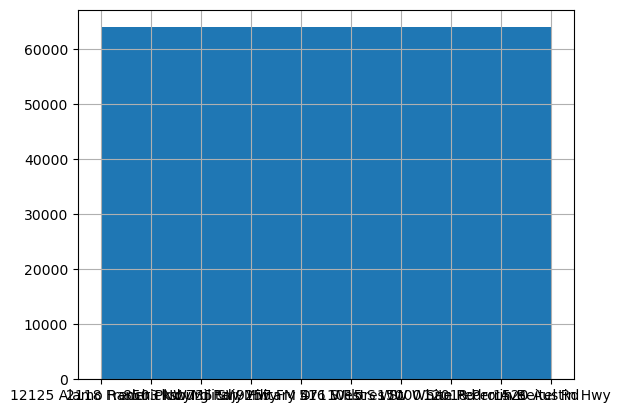

store_city


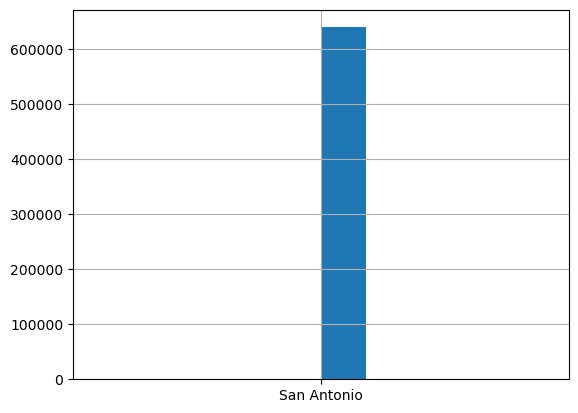

store_id


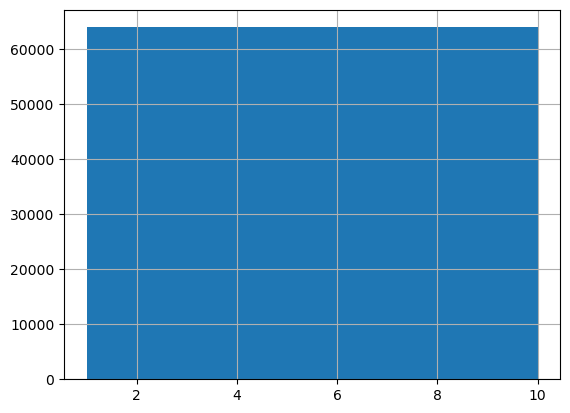

store_state


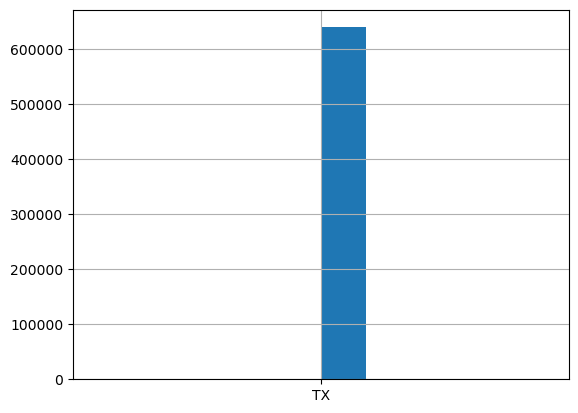

store_zipcode


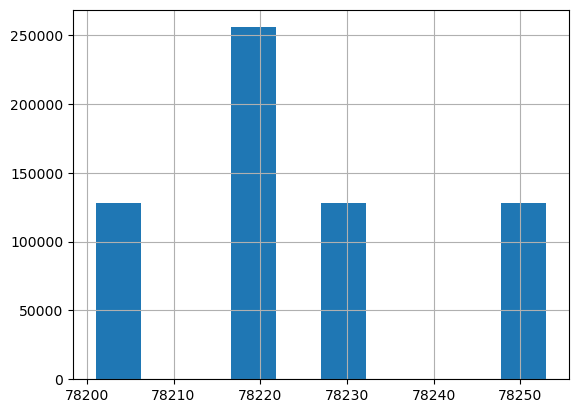

month


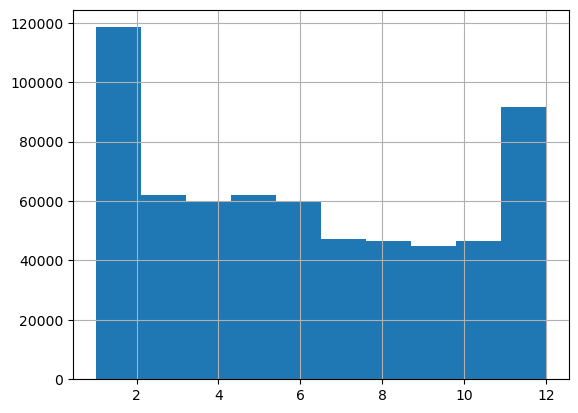

month_name


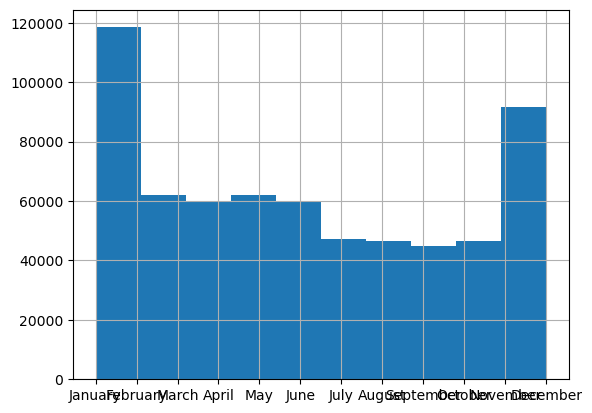

day_of_week


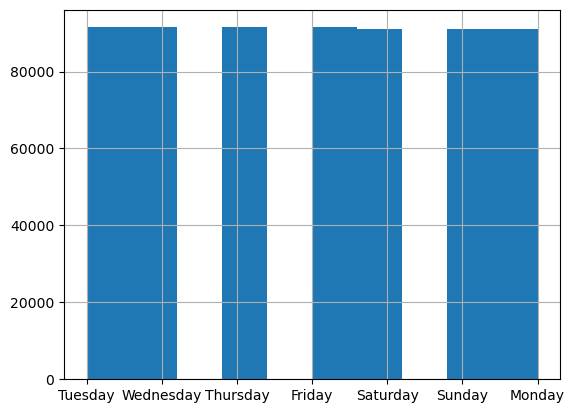

sales_total


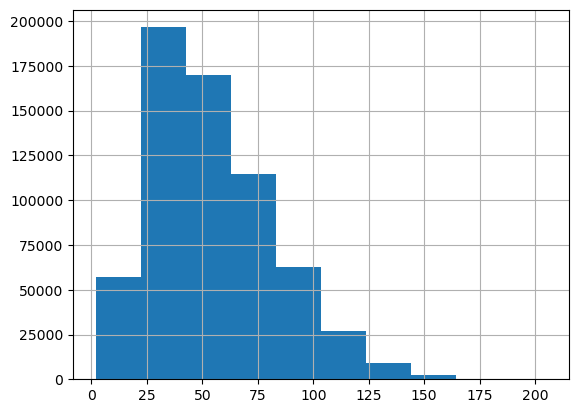

In [26]:
for col in train.columns:
    print(col)
    train[col].hist()
    plt.show()

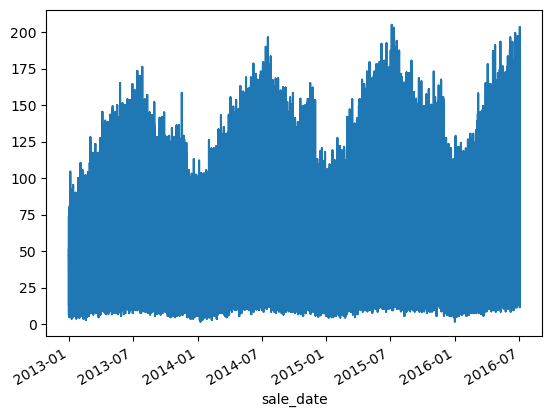

In [29]:
train.sales_total.plot();

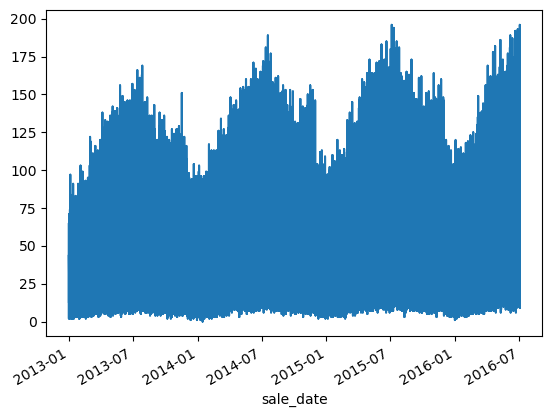

In [31]:
train.sale_amount.plot();

# Average sale amount throughout time

<function matplotlib.pyplot.show(close=None, block=None)>

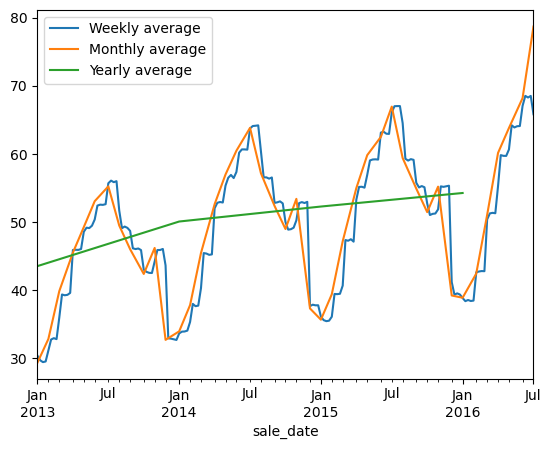

In [48]:
train.sale_amount.resample('W').mean().plot(label='Weekly average')
train.sale_amount.resample('M').mean().plot(label='Monthly average')
train.sale_amount.resample('Y').mean().plot(label='Yearly average')
plt.legend()
plt.show

<AxesSubplot:xlabel='sale_date'>

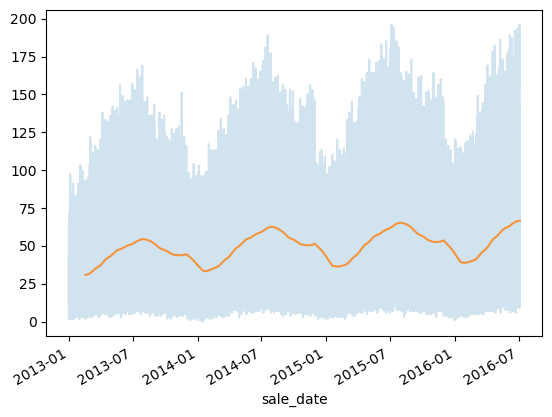

In [42]:
train.sale_amount.plot(alpha=.2, label='Hourly')
train.sale_amount.resample('W').mean().rolling(7).mean().plot(alpha=.8, label='1 week')

In [44]:
train.head()

,item,sale_amount,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,month_name,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,January,Tuesday,13.84
2013-01-01,17,26.0,295813,3,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,January,Tuesday,27.16
2013-01-01,7,32.0,125995,10,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231,1,January,Tuesday,41.64
2013-01-01,18,45.0,314073,3,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,January,Tuesday,49.39
2013-01-01,19,34.0,332333,3,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,January,Tuesday,34.74


### Month sales over time

<function matplotlib.pyplot.show(close=None, block=None)>

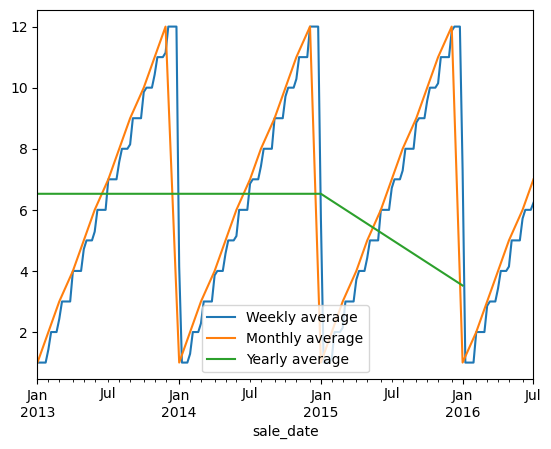

In [47]:
train.month.resample('W').mean().plot(label='Weekly average')
train.month.resample('M').mean().plot(label='Monthly average')
train.month.resample('Y').mean().plot(label='Yearly average')
plt.legend()
plt.show

<AxesSubplot:xlabel='sale_date'>

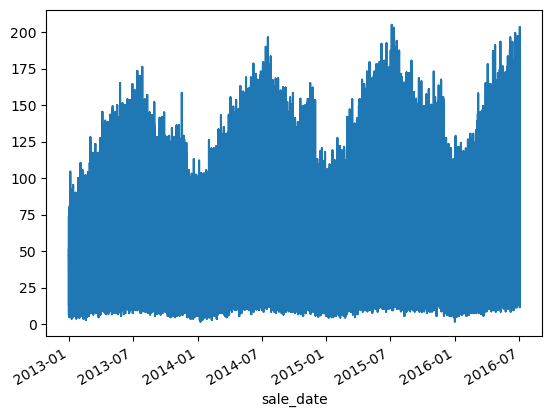

In [55]:
train.sales_total.plot()

In [69]:
train_sales=train[['sales_total']]

In [70]:
train_sales['sales_bin']= pd.qcut(train.sales_total, 3, labels=['low', 'med', 'high'])

/var/folders/wd/5_z1tvw94pv9x2ld8p_0dl2r0000gn/T/ipykernel_56603/3752024000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_sales['sales_bin']= pd.qcut(train.sales_total, 3, labels=['low', 'med', 'high'])
